In [71]:
import numpy as np
import pandas as pd

In [72]:
labels = pd.read_csv('FINAL_RESULTS/FNN_reference_model_SE/labels.csv')
predictions = pd.read_csv('FINAL_RESULTS/FNN_reference_model_SE/prediction.csv')
x_vals = pd.read_csv('FINAL_RESULTS/FNN_reference_model_SE/x_vals.csv')

In [73]:
x_vals

,Unnamed: 0,DA.Price
0,16265,44.21
1,1895,24.49
2,21496,32.86
3,16309,44.44
4,57576,49.85
...,...,...
61059,556,26.25
61060,59879,12.73
61061,28885,36.48
61062,39705,37.94


In [74]:
labels_arr = labels['MW.Load'].to_numpy()
pred_arr = predictions['predict_class'].to_numpy()
x_arr = x_vals['DA.Price']

In [75]:
labels_arr

array([1294, 1240, 1042, ..., 1141,  916, 1188], dtype=int64)

In [76]:
pred_arr

array([1179.84765625, 1107.81311035, 1145.28540039, ..., 1151.97521973,
       1157.19213867, 1169.6932373 ])

In [77]:
print(len(labels_arr))
print(len(pred_arr))
print(len(x_arr))

61064
61064
61064


In [78]:
def MAPELoss2(output, target):
    return np.mean(np.abs((target - output) / target))


In [79]:
print(MAPELoss2(pred_arr, labels_arr))

0.15503383292519485


In [80]:
country = 'SE1'
stdev = 3
df = pd.read_csv(f'{country}_DA_price_v_actual_load_stdev_{stdev}.csv')

df = df[df['DA Price'] > 0]

In [81]:
prices = df['DA Price']
print(len(x_arr))
print(len(df))

61064
61041


In [82]:
x_arr1 = np.array([])
labels_arr1 = np.array([])
pred_arr1 = np.array([])

for i in range(len(x_arr)):
    if not x_arr[i] <= 0:
        x_arr1 = np.append(x_arr1, x_arr[i])
        labels_arr1 = np.append(labels_arr1, labels_arr[i])
        pred_arr1 = np.append(pred_arr1, pred_arr[i])
        #x_arr = np.delete(x_arr, i)
        #labels_arr = np.delete(labels_arr, i)
        #pred_arr = np.delete(pred_arr, i)

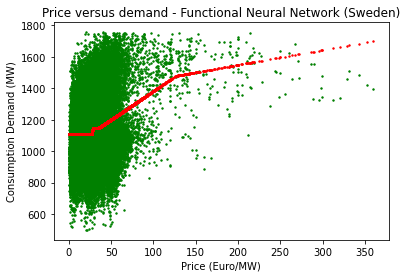

In [83]:
import matplotlib.pyplot as plt

plt.title('Price versus demand - Functional Neural Network (Sweden)')
plt.xlabel('Price (Euro/MW)')
plt.ylabel('Consumption Demand (MW)')
plt.scatter(x_arr1, labels_arr1, c='g', s=2)
plt.scatter(x_arr1, pred_arr1, c='r', s=2)
plt.show()